In [1]:
library(ggplot2)
library(data.table)


hypo_lab <- function(student_id) {
  
  # Parameters
  alpha <- 0.05
  n <- 50
  mu_null <- 100
  sd_true <- 10
  
  offset_range <- 2
  
  set.seed(student_id)
  
  # Controlled Random True Mean (around CI)
  se <- sd_true / sqrt(n)
  ci_halfwidth <- qt(1 - alpha/2, df = n - 1) * se
  offset <- sample(seq(-offset_range, offset_range, 0.1), 1)
  true_mean <- mu_null + offset * ci_halfwidth
  
  # Generating Data
  data <- rnorm(n, mean = true_mean, sd = sd_true)
  
  # T-Test
  t_test <- t.test(data, mu = mu_null)
  t_val <- as.numeric(t_test$statistic)
  p_val <- t_test$p.value
  mean_data <- mean(data)
  sd_data <- sd(data)
  t_crit <- qt(1 - alpha/2, df = n - 1)
  
  # Summary Table
  summary_dt <- data.table(
    Student_ID  = student_id,
    Alpha       = alpha,
    True_Mean   = round(true_mean, 2),
    Sample_Mean = round(mean_data, 2),
    Sample_SD   = round(sd_data, 2),
    N           = n,
    T_Value     = round(t_val, 3),
    P_Value     = round(p_val, 4),
    CI_Lower    = round(t_test$conf.int[1], 2),
    CI_Upper    = round(t_test$conf.int[2], 2),
    T_Crit      = round(t_crit, 3)
  )
  
  # Visualization
  x <- seq(-4, 4, length = 400)
  y <- dt(x, df = n - 1)
  df_t <- data.frame(x, y)
  
  plt <- ggplot(df_t, aes(x, y)) +
    geom_line(size = 1.2, color = "black") +
    geom_area(data = subset(df_t, x <= -t_crit), fill = "red", alpha = 0.4) +
    geom_area(data = subset(df_t, x >=  t_crit), fill = "red", alpha = 0.4) +
    geom_area(data = subset(df_t, x > -t_crit & x < t_crit), fill = "skyblue", alpha = 0.4) +
    geom_vline(xintercept = t_val, color = "blue", linewidth = 1.2) +
    annotate("text", x = t_val, y = 0.05, label = paste0("t = ", round(t_val, 2)), 
             color = "blue", angle = 90, vjust = -0.5) +
    geom_vline(xintercept = c(-t_crit, t_crit), linetype = "dashed", color = "red") +
    labs(
      title = paste0("t-Distribution (α = ", alpha, ", n = ", n, ")"),
      subtitle = paste0("p-value = ", round(p_val, 4)),
      x = "t-value",
      y = "Density"
    ) +
    theme_minimal(base_size = 14)
  
  print(plt)
  data.table(summary_dt)
}

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


Student_ID,Alpha,True_Mean,Sample_Mean,Sample_SD,N,T_Value,P_Value,CI_Lower,CI_Upper,T_Crit
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022301378,0.05,101.99,101.16,10.48,50,0.786,0.4358,98.19,104.14,2.01


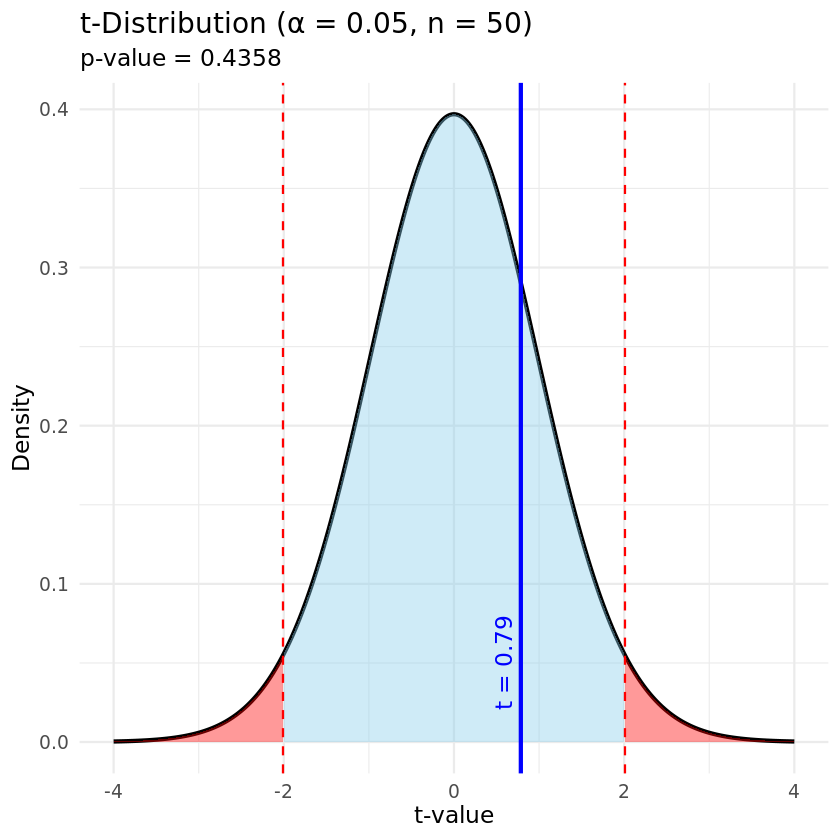

In [2]:
hypo_lab(2022301378)

The Null Hypothesis states that the Mean is 101.99 

According to the P Value, we do not reject the Null Hypothesis since the P Value is greater than the Alpha, 0.4358 > 0.05.

The absolute value of the t-test statistic is smaller than the critical statistic, so we do not reject the Null Hypothesis. 0.786 < 2.01

Based on these two comparisons, we do not reject the Null Hypothesis

Sezen Aksu song: https://www.youtube.com/watch?v=352QSI4nsQk